In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('messages.csv',encoding ='latin-1')
df.head(20)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [3]:
df.label.unique()

array([0, 1], dtype=int64)

In [4]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [5]:
df.shape

(2893, 3)

In [6]:
df.dtypes

subject    object
message    object
label       int64
dtype: object

In [7]:
df['subject'].fillna(df['subject'].mode().values[0],inplace=True)

In [8]:
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [9]:
#Ratio
print ('spam ratio = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')
print ('ham ratio  = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')

spam ratio =  17.0 %
ham ratio  =  83.0 %


In [32]:
df['length'] = df.subject.str.len()
df.head(2)

,subject,message,label,length,length1
0,job posting apple iss research center,content length numbr apple iss research center...,0,37,2167
1,sociolinguistics,lang classification grimes joseph e barbara f ...,0,16,1448


In [33]:
df['length1'] = df.message.str.len()
df.head(2)

,subject,message,label,length,length1
0,job posting apple iss research center,content length numbr apple iss research center...,0,37,2167
1,sociolinguistics,lang classification grimes joseph e barbara f ...,0,16,1448


In [34]:
df['subject'] = df['subject'].str.lower()

In [35]:
df['message'] = df['message'].str.lower()

In [36]:
# Replace email addresses with 'email'
df['subject'] = df['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['subject'] = df['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['subject'] = df['subject'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['subject'] = df['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
# Replace numbers with 'numbr'
df['subject'] = df['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
df['subject'] = df['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['subject'] = df['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['subject'] = df['subject'].str.replace(r'^\s+|\s+?$', '')

In [37]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [38]:
# Replace numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [39]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [40]:
df.head()

,subject,message,label,length,length1
0,job posting apple iss research center,content length numbr apple iss research center...,0,37,2167
1,sociolinguistics,lang classification grimes joseph e barbara f ...,0,16,1448
2,query letter frequencies for text identification,posting inquiry sergei atamas satamas umabnet ...,0,48,1064
3,risk,colleague researching differing degrees risk p...,0,4,210
4,request book information,earlier morning phone friend mine living south...,0,24,629


In [41]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['subject'] = df['subject'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [42]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.subject.str.len()
df.head()

,subject,message,label,length,length1,clean_length
0,job posting apple iss research center,content length numbr apple iss research center...,0,37,2167,37
1,sociolinguistics,lang classification grimes joseph e barbara f ...,0,16,1448,16
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,48,1064,44
3,risk,colleague researching differing degrees risk p...,0,4,210,4
4,request book information,earlier morning phone friend mine living south...,0,24,629,24


In [43]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length1'] = df.message.str.len()
df.head()

,subject,message,label,length,length1,clean_length,clean_length1
0,job posting apple iss research center,content length numbr apple iss research center...,0,37,2167,37,2167
1,sociolinguistics,lang classification grimes joseph e barbara f ...,0,16,1448,16,1448
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,48,1064,44,1064
3,risk,colleague researching differing degrees risk p...,0,4,210,4,210
4,request book information,earlier morning phone friend mine living south...,0,24,629,24,629


In [44]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 88650
Clean Length 79341


In [45]:
# Total length removal
print ('Origian Length', df.length1.sum())
print ('Clean Length', df.clean_length1.sum())

Origian Length 6740965
Clean Length 6740965


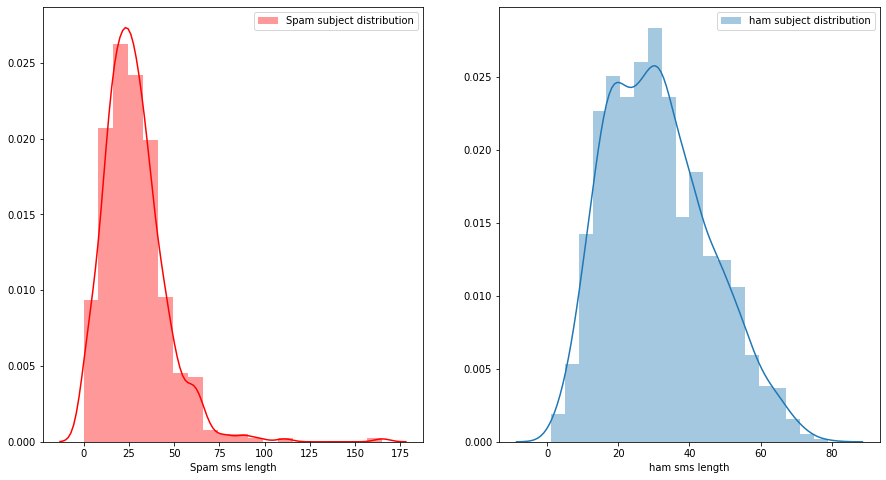

In [51]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='Spam subject distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='ham subject distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

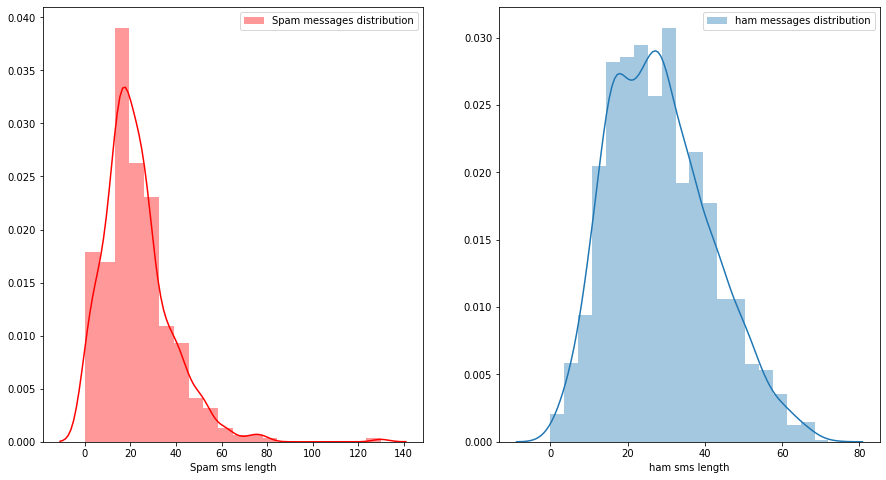

In [52]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

In [53]:
!pip install WordCloud

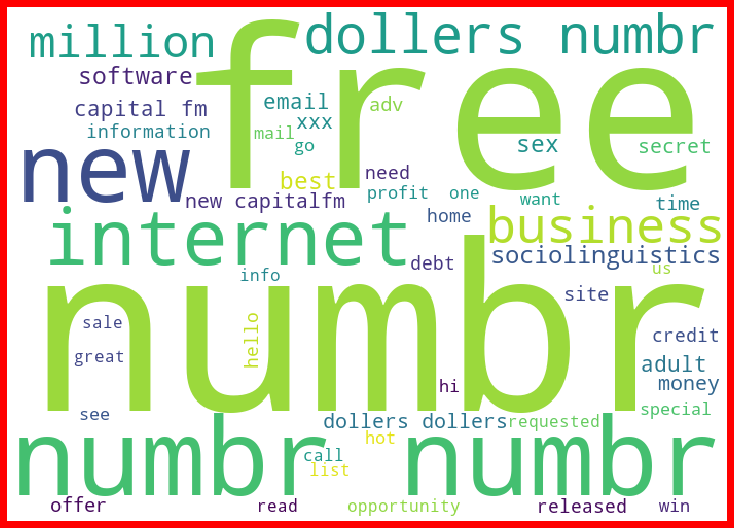

In [55]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['subject'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

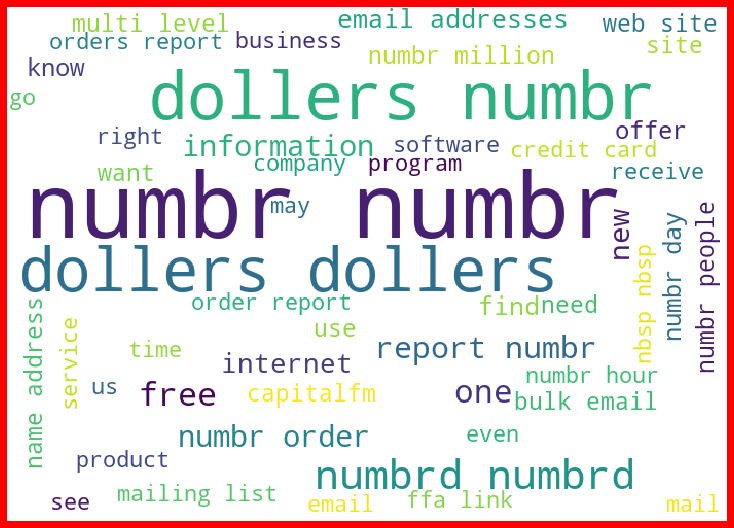

In [56]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [23]:
!pip install WordCloud

In [57]:
#Getting sense of loud words in ham 

hams = df['subject'][df['subject']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

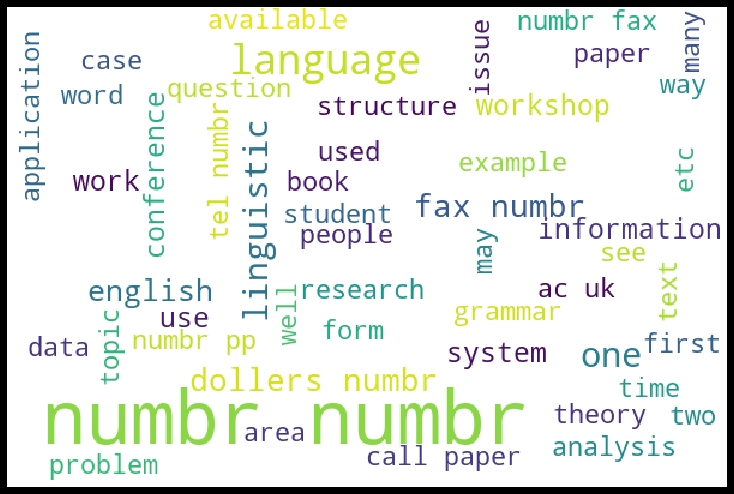

In [58]:
#Getting sense of loud words in ham 

hams = df['message'][df['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [66]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['subject'])


X = features
y = df['label']

In [67]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8825966850828729


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       585
           1       1.00      0.39      0.56       139

    accuracy                           0.88       724
   macro avg       0.94      0.69      0.75       724
weighted avg       0.90      0.88      0.86       724



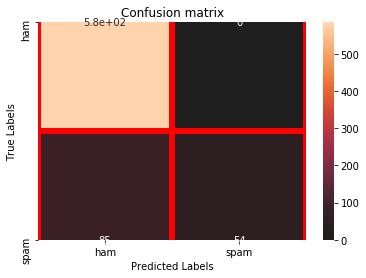

In [69]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [70]:
conf_mat

array([[585,   0],
       [ 85,  54]], dtype=int64)

In [71]:
features1 = tf_vec.fit_transform(df['message'])
X = features1
y = df['label']

In [72]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8342541436464088


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.24       139

    accuracy                           0.83       724
   macro avg       0.91      0.57      0.57       724
weighted avg       0.86      0.83      0.78       724



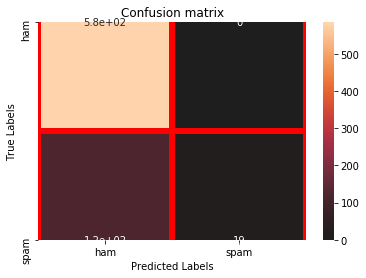

In [74]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [75]:
conf_mat

array([[585,   0],
       [120,  19]], dtype=int64)